In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
cardio_base =  pd.read_csv("cardio_base.csv")
cardio_base

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [96]:
cardio_base['age'] //= 365
cardio_base.age

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

In [97]:
min(cardio_base.age), max(cardio_base.age)

(29, 64)

In [98]:
result = cardio_base.groupby('age')['weight'].mean()
result

age
29    70.000000
30    59.000000
39    72.291573
40    70.914920
41    72.895849
42    71.681523
43    73.983161
44    72.731044
45    74.369430
46    72.717292
47    74.695753
48    74.163059
49    73.929353
50    73.065081
51    75.098530
52    73.432174
53    74.641262
54    73.982996
55    75.266728
56    74.268755
57    75.122789
58    74.619009
59    75.355207
60    74.004313
61    75.707111
62    74.047713
63    75.873721
64    74.619113
Name: weight, dtype: float64

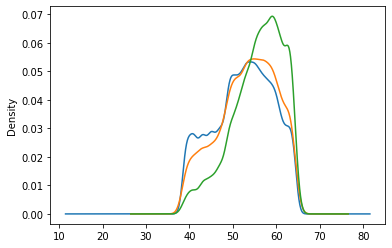

In [99]:
#2 
cardio_base.groupby('cholesterol').age.plot(kind='kde')
plt.show()

In [100]:
h_col_avg = cardio_base[cardio_base.age >= 50].groupby('age').cholesterol.mean().mean()
l_col_avg = cardio_base[cardio_base.age < 50].groupby('age').cholesterol.mean().mean()
h_col_avg / l_col_avg

1.192326742513159

In [101]:
(h_col_avg - l_col_avg) / l_col_avg

0.19232674251315895

In [102]:
men_smoke = cardio_base[cardio_base.gender == 2].smoke.mean()
women_smoke = cardio_base[cardio_base.gender == 1].smoke.mean()
men_smoke / women_smoke

12.257833097333833

In [103]:
cardio_base.height.quantile([0.99])

0.99    184.0
Name: height, dtype: float64

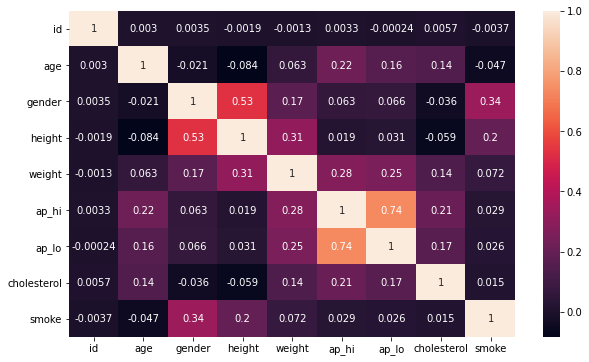

In [104]:
plt.figure(figsize=(10, 6))
corr = cardio_base.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

In [105]:
cardio_base.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,-0.003699
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,-0.047649
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,0.338135
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,0.187989
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.067780
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,-0.000922
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.005186
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.010354
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,1.000000


In [106]:
height_avg = cardio_base.height.mean()
height_std = cardio_base.height.std()
len(cardio_base[cardio_base.height > height_avg + 2 * height_std])/len(cardio_base.height)

0.020557142857142857

In [107]:
cardio_alco =  pd.read_csv("cardio_alco.csv", sep = ";")
base_alco = pd.merge(cardio_base, cardio_alco, on = "id")
base_alco

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,40,1,159,60.0,110,70,1,0,0
1,45,56,1,160,73.0,130,85,1,0,0
2,46,60,2,173,82.0,140,90,3,0,0
3,47,55,1,163,55.0,120,80,1,0,0
4,49,50,2,175,95.0,120,80,1,0,0
...,...,...,...,...,...,...,...,...,...,...
56898,99949,57,1,178,69.0,130,90,1,0,0
56899,99950,53,2,155,76.0,130,90,1,0,0
56900,99951,61,2,170,72.0,120,80,1,0,0
56901,99952,42,2,165,66.0,120,80,1,0,0


In [108]:
smoke_old = base_alco[(base_alco.age > 50) & (base_alco.alco == 1)]
len(smoke_old) / len(base_alco[base_alco.age > 50])

0.049086076910560286

In [109]:
#8
cardio_base.groupby('smoke')[['ap_hi', 'ap_lo']].mean()

,ap_hi,ap_lo
smoke,,
0,128.861431,96.326550
1,128.360512,99.774518


In [110]:
cardio_base.groupby('smoke')['cholesterol'].mean()

smoke
0    1.364682
1    1.389528
Name: cholesterol, dtype: float64

In [111]:
cardio_base.groupby('smoke')['weight'].mean()

smoke
0    73.902352
1    77.344351
Name: weight, dtype: float64

In [112]:
cardio_base.groupby('gender')[['ap_hi', 'ap_lo']].mean()

,ap_hi,ap_lo
gender,,
1,128.139249,94.522776
2,130.078872,100.551982


# Covid

In [113]:
covid = pd.read_csv("covid_data.csv")
covid

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [114]:
germany = covid[covid.location == "Germany"]
italy = covid[covid.location == "Italy"]

germany["cumsum"] = germany.new_cases.cumsum()
italy["cumsum"] = italy.new_cases.cumsum()
germany_italy = pd.merge(germany, italy, on='date')

c:\users\utshab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\utshab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [115]:
germany_italy[abs(germany_italy.cumsum_x - germany_italy.cumsum_y) > 10000]

,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsum_x,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsum_y
72,Germany,2020-03-12,271,1,83783945.0,21.453,45229.245,8.0,1567,Italy,2313,196,60461828.0,23.021,35220.084,3.18,12462
73,Germany,2020-03-13,802,2,83783945.0,21.453,45229.245,8.0,2369,Italy,2651,189,60461828.0,23.021,35220.084,3.18,15113
74,Germany,2020-03-14,693,0,83783945.0,21.453,45229.245,8.0,3062,Italy,2547,252,60461828.0,23.021,35220.084,3.18,17660
75,Germany,2020-03-15,733,3,83783945.0,21.453,45229.245,8.0,3795,Italy,3497,173,60461828.0,23.021,35220.084,3.18,21157
76,Germany,2020-03-16,1043,4,83783945.0,21.453,45229.245,8.0,4838,Italy,2823,370,60461828.0,23.021,35220.084,3.18,23980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278


<AxesSubplot:xlabel='date', ylabel='cumsum'>

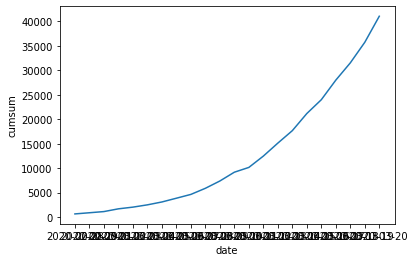

In [116]:
condition = (italy.date >= "2020-02-28") & (italy.date <= "2020-03-20")
sns.lineplot(data=italy[condition], x = 'date', y='cumsum')

In [117]:
(italy[italy.date == "2020-03-20"]["cumsum"]) - (italy[italy.date == "2020-03-20"].new_cases)

10768    35713
dtype: int64

In [118]:
total_deaths = covid.groupby('location').new_deaths.sum()
total_deaths.sort_values(ascending=False)

location
World                              411195
United States                      112006
United Kingdom                      40883
Brazil                              38406
Italy                               34043
                                    ...  
Fiji                                    0
Namibia                                 0
French Polynesia                        0
Timor                                   0
Bonaire Sint Eustatius and Saba         0
Name: new_deaths, Length: 212, dtype: int64

In [119]:
death_rate = total_deaths / covid.population * 1000000

In [120]:
#12
country_death_rate = covid.groupby('location').agg({'new_deaths': 'sum', 'population': 'mean', 'aged_65_older_percent': 'first'})
country_death_rate['death_rate'] = country_death_rate['new_deaths'] / country_death_rate['population'] * 1000000
country_death_rate.sort_values(by='death_rate', ascending=False)

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
San Marino,42,33938.0,NaN,1237.550828
Belgium,9619,11589616.0,18.571,829.967102
Andorra,51,77265.0,NaN,660.066007
United Kingdom,40883,67886004.0,18.517,602.230174
Spain,27136,46754783.0,19.436,580.389818
...,...,...,...,...
French Polynesia,0,280904.0,7.775,0.000000
Fiji,0,896444.0,6.224,0.000000
Mongolia,0,3278292.0,4.031,0.000000


In [121]:
country_death_rate = country_death_rate.dropna()
country_death_rate

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Afghanistan,384,3.892834e+07,2.581,9.864279
Albania,34,2.877800e+06,13.188,11.814581
Algeria,724,4.385104e+07,6.211,16.510440
Angola,4,3.286627e+07,2.405,0.121705
Antigua and Barbuda,3,9.792800e+04,6.933,30.634752
...,...,...,...,...
Vietnam,0,9.733858e+07,7.150,0.000000
World,411195,7.794799e+09,8.696,52.752485
Yemen,127,2.982597e+07,2.922,4.258034


In [122]:
country_aged_65_over_20_percent = country_death_rate[country_death_rate.aged_65_older_percent > 20]
country_aged_65_over_20_percent

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Bulgaria,167,6948445.0,20.801,24.034154
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Greece,183,10423056.0,20.396,17.557231
Italy,34043,60461828.0,23.021,563.049467
Japan,919,126476458.0,27.049,7.266174
Portugal,1492,10196707.0,21.502,146.321749


In [123]:
country_aged_65_over_20_percent_death_rate_over_50_per_million = country_aged_65_over_20_percent[country_aged_65_over_20_percent.death_rate > 50]
country_aged_65_over_20_percent_death_rate_over_50_per_million

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Italy,34043,60461828.0,23.021,563.049467
Portugal,1492,10196707.0,21.502,146.321749


In [124]:
from sklearn.metrics import f1_score
y_pred = [1] * len(country_aged_65_over_20_percent)
y_true = [1] * len(country_aged_65_over_20_percent_death_rate_over_50_per_million) + [0] * (len(country_aged_65_over_20_percent) - len(country_aged_65_over_20_percent_death_rate_over_50_per_million))
f1_score(y_true, y_pred)

0.7272727272727273

In [125]:
gdp_beds_country = covid.groupby('location')['gdp_per_capita', 'hospital_beds_per_thousand'].agg('first').dropna()
gdp_beds_country

c:\users\utshab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,gdp_per_capita,hospital_beds_per_thousand
location,,
Afghanistan,1803.987,0.500
Albania,11803.431,2.890
Algeria,13913.839,1.900
Antigua and Barbuda,21490.943,3.800
Argentina,18933.907,5.000
...,...,...
Vietnam,6171.884,2.600
World,15469.207,2.705
Yemen,1479.147,0.700


In [129]:
country_at_least_5_beds_per_thousand_hospitals = gdp_beds_country[gdp_beds_country.hospital_beds_per_thousand >= 5]
country_at_least_5_beds_gdp_over_10000 = country_at_least_5_beds_per_thousand_hospitals[country_at_least_5_beds_per_thousand_hospitals.gdp_per_capita > 10000]
# country_at_least_5_beds_per_thousand_hospitals
len(country_at_least_5_beds_gdp_over_10000)/len(country_at_least_5_beds_per_thousand_hospitals)

0.8846153846153846